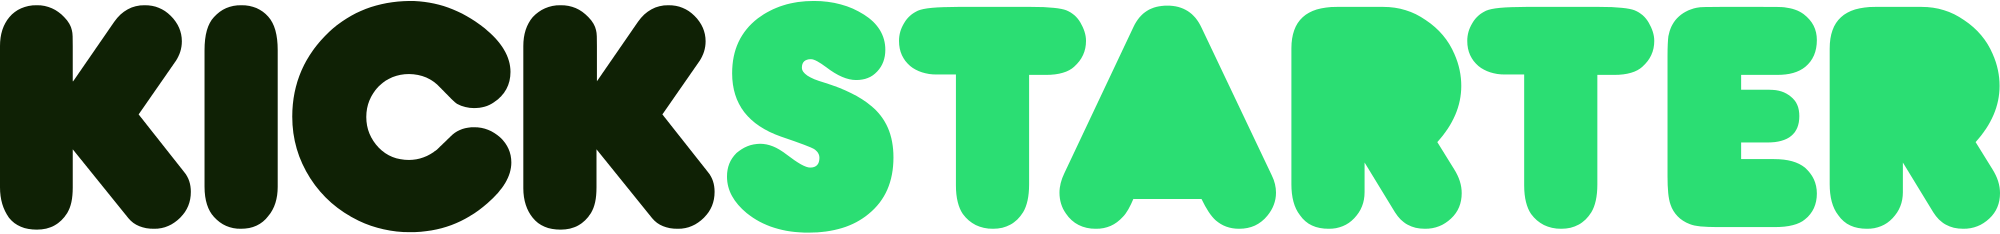

# Project Overview

Our project seeks to build a model that calculates the probability of a Kickstarter project’s success based upon the properties of the project.  In order to construct this model, we will consider the amount of money pledged, the preparation period and total duration of the project, the number of project backers, and the month, day, and year the project was launched. In our second iteration, we may also examine the project title and description to determine if the words used to describe the project have any significant impact on its success. 
	
We will build this model by cleaning and utilizing data from a csv file dataset we obtained from https://data.world, and performing linear regression analyses for each individual attribute of the project. Each attribute will be considered the dependent variable (y axis) in our analyses, and the maximum capacity of the fuel engine will be the independent variable (x axis). 
	
A positive correlation coefficient indicates that the dependent variable likely has a positive contribution to the success of the project, while a negative correlation coefficient indicates the the dependent variable likely has a negative contribution to the success of the project. The closer the correlation coefficient is to zero, the less contribution that particular variable makes. 
	
We hypothesize that the amount of funding behind a project (dollars raised) will be the most significant indicator of its likelihood of success. We are, in part, basing this prediction off of Professor Skiena’s contention that “The average dollar is smarter than the average person.” In other words, looking at what money is being invested in can often tell you a lot about outcomes. 


In [1]:
import pandas as pd
%matplotlib inline
#import pylab as plt

import numpy as np
import scipy as sc
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Data Sources and Rationale

For our first iteration, we obtained our data without writing any code. Rather, we downloaded a csv file from https://data.world. We decided to use this dataset because it contains the exact set of data we need in a comprehensible format.  The data we obtained from  https://data.world is going to help us construct our predictive model by providing us with the project statistics we require procure thorough, accurate conclusions.

We also wrote a web scraper, which we will utilize to obtain data for our second iteration. 
The web scraper obtains data specifically about “popular projects” from the kickstarter website. This will help us perform more in-depth analyses on projects that gain the most funding and attention.


In [2]:
df = pd.read_csv('./kickstarter_data_full.csv', sep=',')
df.head()

c:\users\neel\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


# Data Cleaning

The data was originally in spreadsheet format on the website that needed to be downloaded and converted to CSV format. After converting it to this format, our first step was to rename certain columns and delete ones that were unnecessary for our experiment. This step left us with columns that were directly relevant to our experiment.  
Our data cleaning plan was to take the data in that format and standardize units as well as convert numbers in string form into float form. Most importantly, we converted the column for determining whether a project succeeded, failed, or got cancelled into a numerical form so it could be graphed and the dependent variables compared. By having these numbers for project success as the x-axis for our graphs, we could create linear regressions for each variable to determine what their effect was on this percentage.
 


df = df.drop(['photo', 'blurb', 'slug', 'disable_communication', 'currency_symbol', 
              'currency_trailing_code', 'USorGB', 'TOPCOUNTRY', 'deadline', 'blurb_len_clean', 'state_changed_at_weekday', 
             'deadline_day', 'deadline_hr', 'LaunchedTuesday', 'DeadlineWeekend', 'SuccessfulBool', 
              'launch_to_deadline_days', 'launch_to_state_change', 'create_to_launch', 'launched_at_hr'], axis=1)
df.head()


df = df.rename(index=str, columns={"launch_to_state_change_days": "duration_of_project", "create_to_launch_days": 
                                   "preparation_period", "launched_at_year" : "year_launched", "launched_at_day" : "day_of_month", 
                                  "launched_at_month" : "month_launched", "created_at_hr" : "hour_of_day_launched", "created_at_day":
                                  "day_of_month_created", "created_at_month": "month_created"})

In [3]:
#coverts date columns to the appropriate units
def convertToDatetime(df,tag):
    list = []
    for i in df[tag]:
        list.append(pd.to_datetime(i))#converts to pandas datetime format
    df[tag+'_plt'] = list #added new row for future reference

convertToDatetime(df,'launched_at')
    
#launched_at = []
#for i in df['launched_at']:
#    launched_at.append(pd.to_datetime(i))#converts to pandas datetime format
#df['launched_at_plt'] = launched_at #added new row for future reference

The following code converts certain columns of our dataframe to USD based on fixed excahnge rates.  A future goal is to scrape the data off the internet based on the year each campaign was launched.  

In [4]:
#change currencies to USD 

column_of_interest = ''
columns_for_edit = 'goal', 'pledged'
total_rows = df.count
uniqueVals = []

#Currency Definitions

#the "rates" indicate the number by which each currency must be multiplied
#as of 2018 in order to be represented in a US dollar amount

us_dollar = 'USD'
us_rate = 1.0
#AUD = 0.75 USD
australian_dollar = 'AUD'
australian_rate = 0.75
#CAD = 0.78 USD
canadian_dollar = 'CAD'
canadian_rate = 0.78
#CHF = USD
swiss_franc = 'CHF'
swiss_rate = 1.0
#DKK = 0.16 USD
danish_krone = 'DKK'
danish_rate = 0.16
#EUR = 1.20 USD
euro = 'EUR'
euro_rate = 1.20
#GBP = 1.35 USD
british_pound = 'GBP'
british_rate = 1.35
#HKD = 0.13 USD
hong_kong_dollar = 'HKD'
hong_kong_rate = 0.13
#MXN = 0.052 USD
mexican_peso = 'MXN'
mexican_rate = 0.052
#NOK = 0.12 USD
norwegian_krone = 'NOK'
norwegian_rate = 0.12
#NZD = 0.70 USD
new_zealand_dollar = 'NZD'
new_zealand_rate = 0.70
#SEK = 0.11 USD
swedish_krona = 'SEK'
swedish_rate = 0.11
#SGD = 0.75 USD
singapore_dollar = 'SGD'
singapore_rate = 0.75


#find_unique_currencies prints ['$' 'Fr ' 'kr' '£' '€']
def find_unique_currency_symbols():
    column_of_interest = 'currency_symbol'
    my_list = df[column_of_interest]
    uniqueVals = np.unique(my_list) #['$' 'Fr ' 'kr' '£' '€']
    print(uniqueVals)

#We will use currencies rather than symbols because it prints more
#currency types, which suggests the currency symbols are not entirely thorough/
#accurate. This method prints the the below:
#['AUD' 'CAD' 'CHF' 'DKK' 'EUR' 'GBP' 'HKD' 'MXN' 'NOK' 'NZD' 'SEK' 'SGD''USD']

def find_unique_currencies():
    column_of_interest = 'currency'
    my_list = df[column_of_interest]
    uniqueVals = np.unique(my_list)
    print(uniqueVals)


def convert_to_dollars():
     currency_list = df['currency']
     goal_list = df['goal']
     pledged_list = df['pledged']
     i = 1
     while i < len(currency_list):
        if currency_list.at[i] == us_dollar:
          goal_list.at[i] = pd.to_numeric(goal_list.at[i])
          pledged_list.at[i] = pd.to_numeric(pledged_list.at[i])
          i+=1
        elif currency_list[i] == australian_dollar:
            goal_list.at[i] = pd.to_numeric(goal_list.at[i]) * australian_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * australian_rate
            i+=1
        elif currency_list.at[i] == canadian_dollar:
            goal_list.at[i] = pd.to_numeric(goal_list.at[i]) * canadian_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * canadian_rate
            i+=1
        elif currency_list.at[i] == swiss_franc:
            goal_list.at[i] = pd.to_numeric(goal_list.at[i]) * swiss_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * swiss_rate
            i+=1
        elif currency_list.at[i] == danish_krone:
            goal_list.at[i] = pd.to_numeric(goal_list.at[i]) * danish_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * danish_rate
            i+=1
        elif currency_list.at[i] == euro:
            goal_list.at[i] = pd.to_numeric(goal_list[i])* euro_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * euro_rate
            i+=1
        elif currency_list.at[i] == british_pound:
            goal_list.at[i] = pd.to_numeric(goal_list[i])* british_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * british_rate
            i+=1
        elif currency_list.at[i] == hong_kong_dollar:
            goal_list.at[i] = pd.to_numeric(goal_list.at[i])* hong_kong_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * hong_kong_rate
            i+=1
        elif currency_list.at[i] == mexican_peso:
            goal_list.at[i] = pd.to_numeric(goal_list.at[i])* mexican_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * mexican_rate
            i+=1
        elif currency_list.at[i] == norwegian_krone:
            goal_list.at[i] = pd.to_numeric(goal_list.at[i])* norwegian_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * norwegian_rate
            i+=1
        elif currency_list.at[i] == new_zealand_dollar:
            goal_list.at[i] = pd.to_numeric(goal_list.at[i])* new_zealand_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * new_zealand_rate
            i+=1
        elif currency_list.at[i] == singapore_dollar:
            goal_list.at[i] = pd.to_numeric(goal_list.at[i])* singapore_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * singapore_rate
            i+=1
        elif currency_list.at[i] == swedish_krona:
            goal_list.at[i] = pd.to_numeric(goal_list.at[i])* swedish_rate
            pledged_list.at[i] = pd.to_numeric(pledged_list.at[i]) * swedish_rate
            i+=1

     df['goal_list_dollars'] = goal_list.values
     df['pledged_list-dollars'] = pledged_list.values

convert_to_dollars()

These first few graphs are simply to get a feel for the data and give clues as to where to go next.  

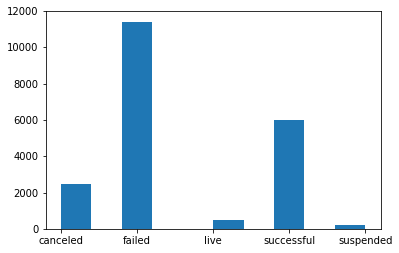

In [5]:
states = df['state']
hist1 = plt.hist(states)
plt.show()
#plot_hist(df, 'state')

Proportions of kickstarter project successes over the lifetime

Overall Success Rate:  52.715487035739315 %
years of operation:  [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


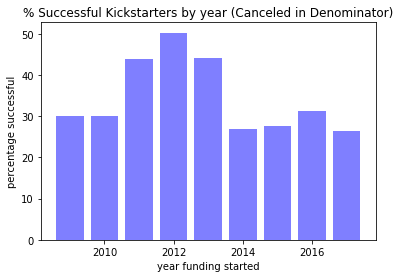

In [6]:
success = df[df['state'] == 'successful']
failed = df[df['state'] == 'failed']
prob_success = len(success)/len(failed)
print("Overall Success Rate: ",prob_success*100,"%")

#grab list of all years possible
def grab_years(df):
    years = []
    for i in df['launched_at_yr']:
        if(i not in years):
            years.append(i)
    years.sort()
    return years

print("years of operation: ",grab_years(df))

#get all rows of a certain year
def grab_year(df, year):
    return df[df.launched_at_yr.isin([year])]

def grab_state(df, state):
    return df[df['state'] == state]

#create list of success ratios for every year
def success_rate_getter(df, years):
    success_rate_by_yr = []
    for year in years:
        success = grab_year(df,year)
        failure = grab_year(df,year)
        cancel = grab_year(df,year)
        success = grab_state(success, 'successful')
        failure = grab_state(failure, 'failed')
        cancel = grab_state(cancel, 'canceled')
        year_ratio = 100*len(success)/(len(success)+len(failure)+len(cancel))
        success_rate_by_yr.append(year_ratio)
    return success_rate_by_yr
    
#create graph showing success rates by year
x = grab_years(df)
y = success_rate_getter(df,x)
plt.bar(x, y, color='b', alpha=0.5,)
plt.title('% Successful Kickstarters by year (Canceled in Denominator)')
plt.xlabel('year funding started')
plt.ylabel('percentage successful')
plt.show()

This first graph shows the success rate of kickstarter project over the years, only counting the ones that were successful, unsuccessful, or canceled as the denominator

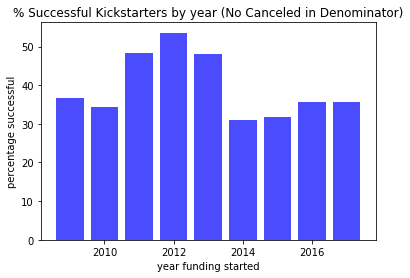

In [7]:
def success_rate_getter_no_canceled(df, years):
    success_rate_by_yr = []
    for year in years:
        success = grab_year(df,year)
        failure = grab_year(df,year)
        success = grab_state(success, 'successful')
        failure = grab_state(failure, 'failed')
        year_ratio = 100*len(success)/(len(success)+len(failure))
        success_rate_by_yr.append(year_ratio)
    return success_rate_by_yr

x = grab_years(df)
y = success_rate_getter_no_canceled(df,x)
plt.bar(x, y, color='blue', alpha=0.7,)
plt.title('% Successful Kickstarters by year (No Canceled in Denominator)')
plt.xlabel('year funding started')
plt.ylabel('percentage successful')
plt.show()

This next graph describes a similar concept as before, but without cancelled data factoring into the final calculation.  

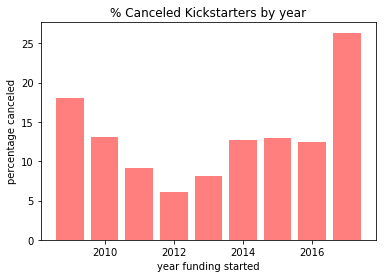

In [8]:
def canceled_rate_getter(df, years):
    cancel_rate_by_yr = []
    for year in years:
        success = grab_year(df,year)
        failure = grab_year(df,year)
        cancel = grab_year(df,year)
        success = grab_state(success, 'successful')
        failure = grab_state(failure, 'failed')
        cancel = grab_state(cancel, 'canceled')
        year_ratio = 100*len(cancel)/(len(success)+len(failure)+len(cancel))
        cancel_rate_by_yr.append(year_ratio)
    return cancel_rate_by_yr

x = grab_years(df)
y = canceled_rate_getter(df,x)
plt.bar(x, y, color='red', alpha=0.5,)
plt.title('% Canceled Kickstarters by year')
plt.xlabel('year funding started')
plt.ylabel('percentage canceled')
plt.show()

This shows the % of canceled kickstaters by year

[30.0, 29.95169082125604, 43.85964912280702, 50.39525691699605, 44.7, 28.97018970189702, 28.12036448400085, 33.01465901848311, 26.53061224489796]


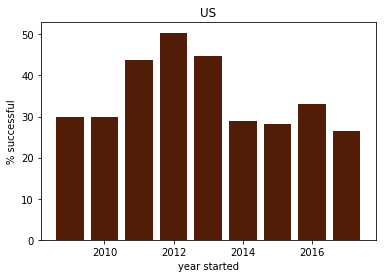

[0, 0, 0, 0, 0, 0, 23.225806451612904, 26.486486486486488, 30.0]


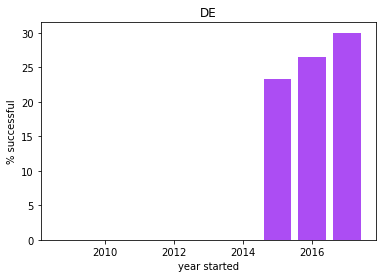

[0, 0, 0, 46.666666666666664, 44.13793103448276, 28.926701570680628, 38.684503901895205, 42.42424242424242, 15.384615384615385]


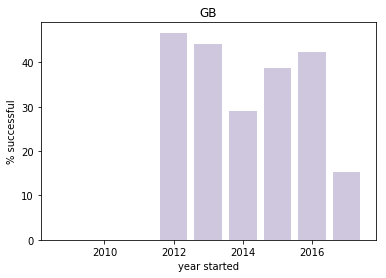

[0, 0, 0, 0, 20.689655172413794, 17.98780487804878, 22.911694510739856, 26.893939393939394, 27.272727272727273]


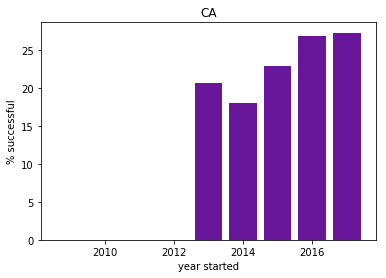

[0, 0, 0, 0, 50.0, 10.849056603773585, 20.0, 20.895522388059703, 0.0]


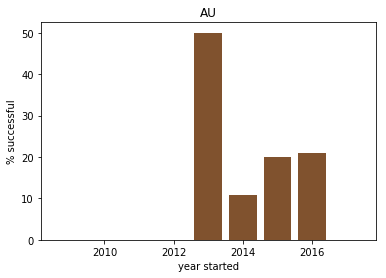

[0, 0, 0, 0, 0, 0, 23.80952380952381, 10.81081081081081, 0]


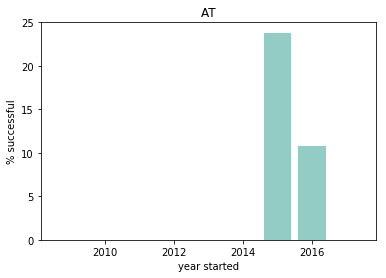

[0, 0, 0, 0, 0, 0, 13.793103448275861, 26.785714285714285, 50.0]


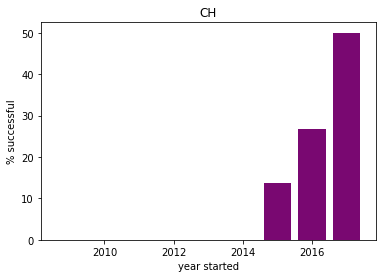

[0, 0, 0, 0, 75.0, 19.444444444444443, 22.5, 28.0, 100.0]


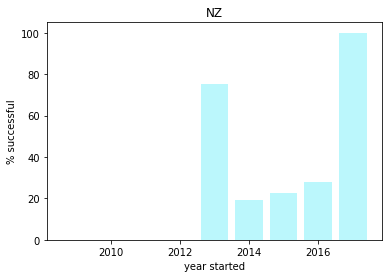

[0, 0, 0, 0, 0, 0, 3.658536585365854, 10.416666666666666, 50.0]


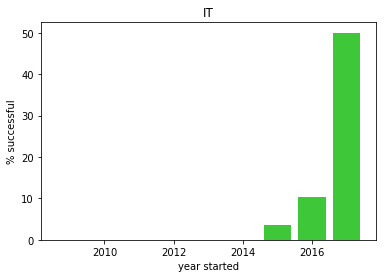

[0, 0, 0, 0, 0, 11.650485436893204, 24.409448818897637, 27.38095238095238, 0.0]


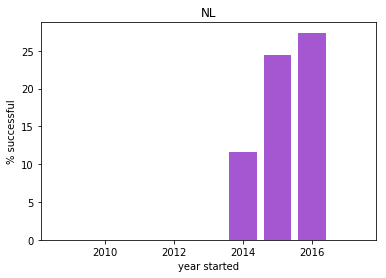

[0, 0, 0, 0, 0, 15.789473684210526, 19.047619047619047, 16.666666666666668, 0.0]


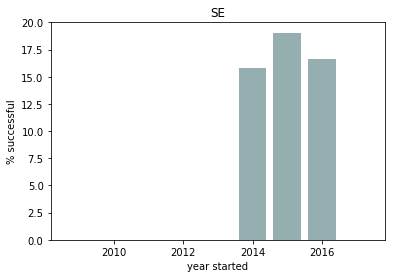

[0, 0, 0, 0, 0, 0, 21.014492753623188, 21.568627450980394, 25.0]


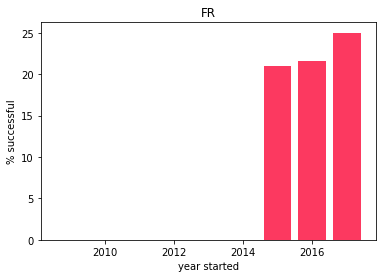

[0, 0, 0, 0, 0, 0, 0, 26.470588235294116, 33.333333333333336]


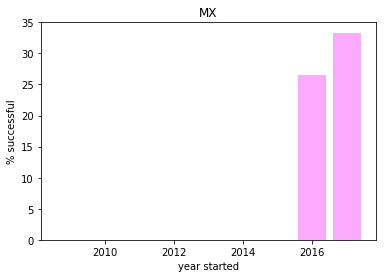

[0, 0, 0, 0, 0, 0, 9.836065573770492, 14.736842105263158, 33.333333333333336]


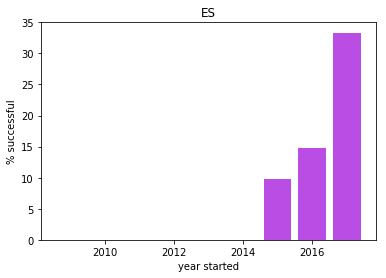

[0, 0, 0, 0, 0, 15.789473684210526, 18.46153846153846, 14.705882352941176, 0.0]


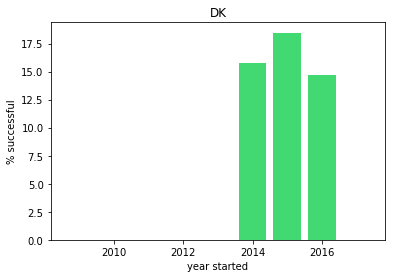

[0, 0, 0, 0, 0, 22.22222222222222, 25.714285714285715, 38.70967741935484, 0.0]


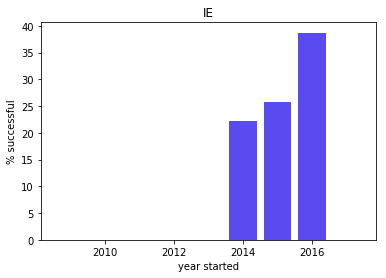

[0, 0, 0, 0, 0, 8.333333333333334, 16.666666666666668, 14.285714285714286, 0]


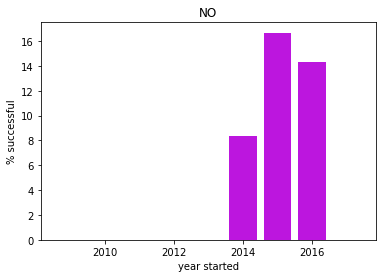

[0, 0, 0, 0, 0, 0, 5.882352941176471, 10.0, 0]


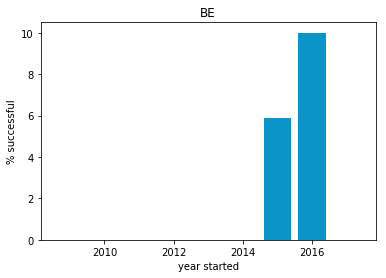

[0, 0, 0, 0, 0, 0, 100.0, 0.0, 0]


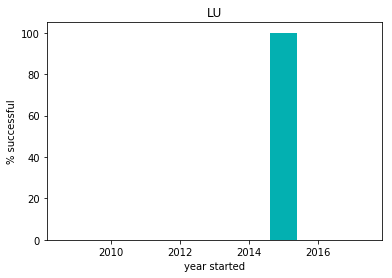

[0, 0, 0, 0, 0, 0, 0, 31.57894736842105, 0.0]


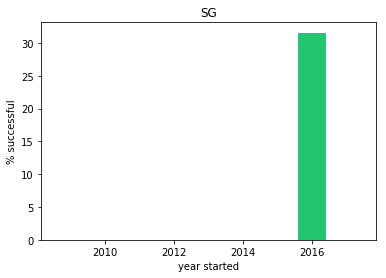

[0, 0, 0, 0, 0, 0, 0, 50.0, 50.0]


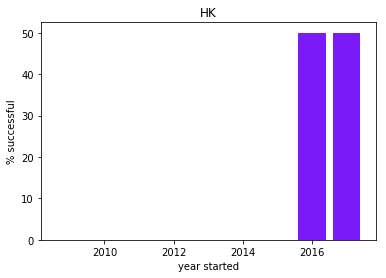

In [9]:
def grab_all_countries(df):
    countries = []
    for i in df['country']:
        if(i not in countries):
            countries.append(i)
    return countries

def grab_country(df, country):
    return df[df['country'] == country]

def success_rate_getter_countries(df, years, countries):
    success_rate_by_country = []
    for country in countries:
        success_rate_by_year_by_country = []
        for year in years:
            success = grab_year(df,year)
            failure = grab_year(df,year)
            cancel = grab_year(df,year)
            success = grab_country(success,country)
            failure = grab_country(failure,country)
            cancel = grab_country(cancel,country)
            success = grab_state(success, 'successful')
            failure = grab_state(failure, 'failed')
            cancel = grab_state(cancel, 'canceled')
            if((len(success)+len(failure)+len(cancel))==0):
                country_year_ratio = 0
            else:
                country_year_ratio = 100*len(success)/(len(success)+len(failure)+len(cancel))
            success_rate_by_year_by_country.append(country_year_ratio)
        success_rate_by_country.append(success_rate_by_year_by_country)
    return success_rate_by_country

all_countries = grab_all_countries(df)
x = grab_years(df)
results = success_rate_getter_countries(df, x, all_countries)

for i in range(len(all_countries)):
    y = results[i]
    print(results[i])
    plt.bar(x,y,color=np.random.rand(3,))
    plt.ylabel('% successful')
    plt.xlabel('year started')
    plt.title(all_countries[i])
    plt.show()

These histograms show the same year to year success data, but controlled by countries. (removed display in order to lower compile time, graphs were not very useful) 

In [10]:
df.describe()

,Unnamed: 0,id,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,...,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,goal_list_dollars,pledged_list-dollars
count,20632.000000,2.063200e+04,2.063200e+04,2.063200e+04,20632.000000,20632.000000,2.063200e+04,20627.000000,20627.000000,20627.000000,...,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,20632.000000,2.063200e+04,2.063200e+04
mean,10315.500000,1.071156e+09,8.617713e+04,2.078054e+04,183.675843,1.039363,2.091591e+04,5.940806,5.292578,18.991177,...,49.577598,34.716896,31.169397,0.291683,0.806466,0.816208,0.225136,0.292022,8.617713e+04,2.078054e+04
std,5956.089713,6.154929e+08,1.222374e+06,1.147965e+05,1222.012658,0.230419,1.154717e+05,2.826118,2.418168,4.632371,...,111.094601,11.873143,14.279705,0.454548,0.395078,0.387324,0.417682,0.454703,1.222374e+06,1.147965e+05
min,0.000000,1.645550e+05,7.800000e-01,0.000000e+00,0.000000,0.045641,0.000000e+00,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.800000e-01,0.000000e+00
25%,5157.750000,5.472185e+08,4.000000e+03,2.500000e+01,2.000000,1.000000,2.500000e+01,4.000000,3.000000,17.000000,...,3.000000,30.000000,28.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000e+03,2.500000e+01
50%,10315.500000,1.069882e+09,1.350000e+04,7.003950e+02,12.000000,1.000000,7.163012e+02,6.000000,5.000000,20.000000,...,14.000000,30.000000,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.350000e+04,7.003950e+02
75%,15473.250000,1.601801e+09,4.500000e+04,5.936000e+03,63.000000,1.000000,6.004628e+03,8.000000,7.000000,22.000000,...,45.000000,40.000000,35.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.500000e+04,5.936000e+03
max,20631.000000,2.147388e+09,1.000000e+08,6.225355e+06,105857.000000,1.715913,6.225355e+06,16.000000,14.000000,35.000000,...,1754.000000,91.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+08,6.225355e+06


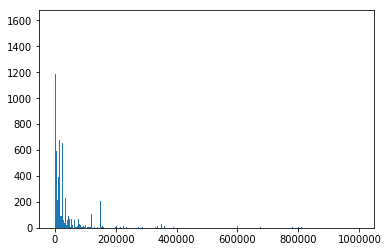

In [11]:
def frange(start, stop, step):
    list = []
    i = start
    while i < stop:
        list.append(i)
        i += step
    return list
x = df['goal']
#hist = plt.hist(x, bins = 30)
#plt.show()
#x = np.random.randn(10000)

x_funding,y_funding,_ = plt.hist(x, bins = frange(-0,1000000,1000))
plt.show()

This histogram shows the distribution of pricing requests.  

largest # of product launches:  7264.0


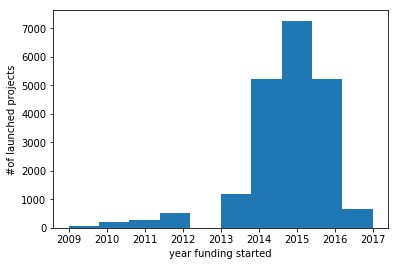

In [12]:
list_years_launched = df['launched_at_yr']
x_launches,y_launches,_ = plt.hist(list_years_launched)
plt.ylabel('#of launched projects')
plt.xlabel('year funding started')
print("largest # of product launches: ",x_launches.max())
plt.show()
#plot_data = pd.Series(data_hist(year_launched,df), data_hist())

This shows the distribution of projects by year

This histogram shows the growth of kickstarter over the years, the missing piece of data is simply the graph outputting teh bars with incorrect width.  

THINGS TO DO: 
-Scrape from google to determine the value of currencies for every single (year, currency) tuple.  
-Create a twitter scraper using tweepy
-determine distributions for amount of money requested
-determine time of posting the kickstarter?

35.0


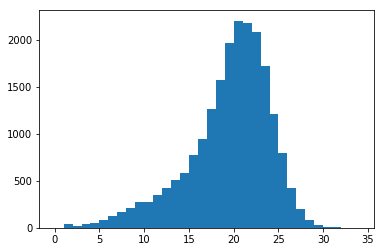

In [13]:
x_blurb_len = df['blurb_len'].dropna() #removes the nan's from the series of blurb lengths
print(x_blurb_len.max())
x,y,_ = plt.hist(x_blurb_len, bins = frange(0,x_blurb_len.max(),1))
plt.show()

this shows the distribution of the sizes of blurbs in kickstarter campaigns

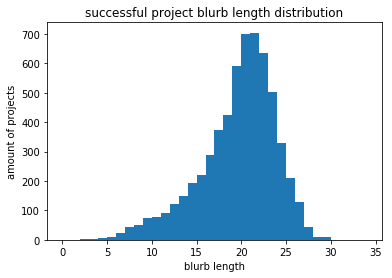

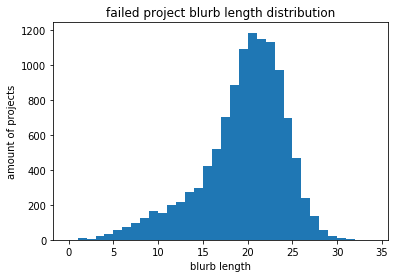

In [14]:
success_blurbs = success['blurb_len']
failed_blurbs = failed['blurb_len']
x_succ,y_succ,_succ = plt.hist(success_blurbs, bins = frange(0,x_blurb_len.max(),1))
plt.xlabel('blurb length')
plt.ylabel('amount of projects')
plt.title('successful project blurb length distribution')
plt.show()
x_fail,y_fail,_fail = plt.hist(failed_blurbs, bins = frange(0,x_blurb_len.max(),1))
plt.xlabel('blurb length')
plt.ylabel('amount of projects')
plt.title('failed project blurb length distribution')
plt.show()

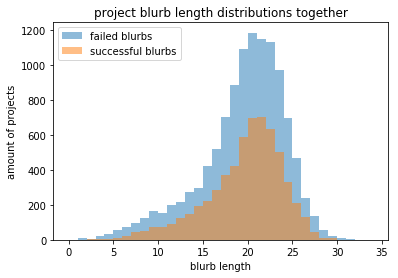

t test results: t:  1.6107719063248163  probability:  0.10725321480782991


In [15]:
x_fail,y_fail,_fail = plt.hist(failed_blurbs, alpha = 0.5, bins = frange(0,x_blurb_len.max(),1), label = 'failed blurbs')
x_succ,y_succ,_succ = plt.hist(success_blurbs, alpha = 0.5, bins = frange(0,x_blurb_len.max(),1), label = 'successful blurbs')

plt.xlabel('blurb length')
plt.ylabel('amount of projects')
plt.title('project blurb length distributions together')
plt.legend(loc = 'upper left')
plt.show()

t, prob = sc.stats.ttest_ind(success_blurbs, failed_blurbs, equal_var = False)
print('t test results: t: ',t,' probability: ',prob)



This shows no obvious relationship between the blurb length and the success rate.  The t-test overcuts our needed p-value of 0.05.  

Next we shall see if there is any relationship between success and a variaty of timing factors.  

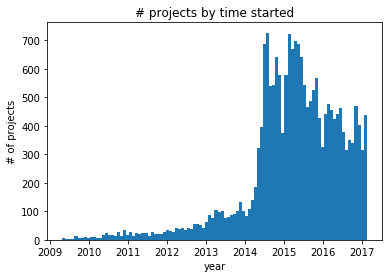

In [16]:
plt.hist(df['launched_at_plt'].values, bins = 100)
plt.title('# projects by time started')
plt.xlabel('year')
plt.ylabel('# of projects')
plt.show()

Overall distribution of times projects were started.  We needed to see if this data was something that needed to be split up into two groups by date, given kickstarter's relatively recent popularity.  This graph demonstrates that this may be neccessary.  

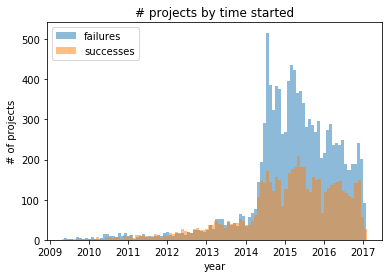

(100,)
(100,)


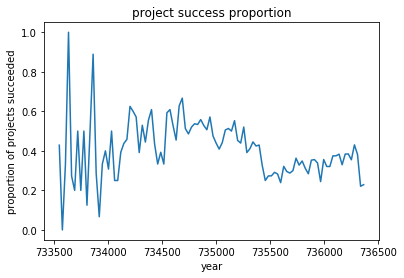

In [17]:
launched_at_failures = failed['launched_at_plt']#grab every failed launch date
laf_y, la_x, _ = plt.hist(launched_at_failures.values, bins = 100, alpha = 0.5, label = 'failures')
launched_at_successes = success['launched_at_plt'] #grab every successful launch date
las_y, la_x, _ = plt.hist(launched_at_successes.values, bins = 100, alpha = 0.5, label = 'successes')

plt.title('# projects by time started')
plt.xlabel('year')
plt.ylabel('# of projects')
plt.legend(loc = 'upper left')
plt.show()
print(las_y.shape)
print(laf_y.shape)

plt.close()

la_x = np.delete(la_x,0)
#print(la_x.shape)

la_ratio = las_y/(las_y+laf_y)
plt.plot(la_x, la_ratio)
plt.title('project success proportion')
plt.xlabel('year')
plt.ylabel('proportion of projects succeeded')
plt.show()

Thiks distribution graph told us that we probably needed to compare data before and after 2014 separately, given the quite sudden increase in popularity and decrease in proportion of projects succeeding.  For the purposes of our prediction model, it is safe to say we should use the post-2014 data to be safe.  

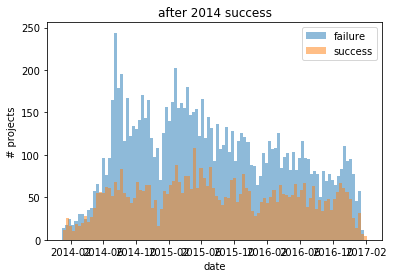

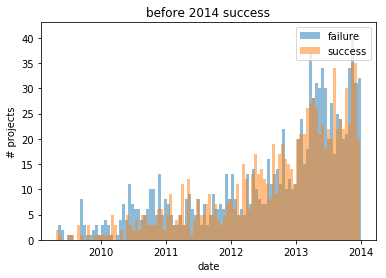

In [18]:
#find same graphs for after 2014 years
launched_at_failures = failed[failed['launched_at_plt'].dt.year>=2014] #accessing year of datetime and defining rule
launched_at_failures = launched_at_failures['launched_at_plt']
laf_y,la_x,_ = plt.hist(launched_at_failures.values, bins = 100, alpha = 0.5, label = 'failure')

launched_at_successes = success[success['launched_at_plt'].dt.year>=2014] #accessing year of datetime and defining rule
launched_at_successes = launched_at_successes['launched_at_plt']
las_y, la_x, _ = plt.hist(launched_at_successes.values, bins = 100, alpha = 0.5, label = 'success')
plt.title('after 2014 success')
plt.xlabel('date')
plt.ylabel('# projects')
plt.legend(loc = 'upper right')
plt.show()

plt.close()

#do again for before 2014 years
launched_at_failures = failed[failed['launched_at_plt'].dt.year<2014] #accessing year of datetime and defining rule
launched_at_failures = launched_at_failures['launched_at_plt']
laf_y,la_x,_ = plt.hist(launched_at_failures.values, bins = 100, alpha = 0.5, label = 'failure')

#launched_at_successes = success[np.asarray(success['launched_at_plt'].dt.year.tolist())>=2014] #grab every successful launch date
launched_at_successes = success[success['launched_at_plt'].dt.year<2014] #accessing year of datetime and defining rule
launched_at_successes = launched_at_successes['launched_at_plt']
las_y, la_x, _ = plt.hist(launched_at_successes.values, bins = 100, alpha = 0.5, label = 'success')
plt.title('before 2014 success')
plt.xlabel('date')
plt.ylabel('# projects')
plt.legend(loc = 'upper right')
plt.show()



These cut up graphs are further demonstration of why we need to separate our data into two different eras of kickstarter funding.  We notice some dips in the number of kickstarter campaigns during the winter holidays of every single year.  This is probably due to presence of vacation weeks with family and friends.  

Second Cleanup Stage:

In [19]:
#this is where extra cleanups based on our finding of what needs to be blocked are placed
#an important aspect must be the creation of a goal percentage to do correlation tests on, 
#since this is a gold standard of success/failure
df['percent_goal_met'] = df['pledged'].values/df['goal'].values
#print(df['percent_goal_met'])

#from this point on we block by years, so we create new dataframes with the appripriate data
#documentation to find intersection between dataframes: pd.merge(df1, df2, how='inner', on=['user_id'])
before_2014 = df[df['launched_at_plt'].dt.year<2014]
after_2014 = df[df['launched_at_plt'].dt.year>=2014]

This is a display of what these new dataframes look like:

In [20]:
before_2014

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,launched_at_plt,goal_list_dollars,pledged_list-dollars,percent_goal_met
120,120,1098667121,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Ciervos - Electronic Band's 1st Album,Denlin is looking for the funding to create hi...,2000.0,85.00,failed,ciervos-electronic-bands-1st-album,False,...,35,0,1,1,0,1,2011-07-30 22:50:24,2000.0,85.00,0.042500
121,121,685338876,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",renegadedrum.bandcamp.com,renegadedrum.bandcamp.com,2000.0,182.00,failed,100-native-american-dance-music-walk-in-beauty-lp,False,...,32,0,1,1,0,0,2013-06-15 09:59:26,2000.0,182.00,0.091000
123,123,1575630229,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Life Is Heller - Me In A Bubble,"Help us get our debut album ""Me In A Bubble"" p...",3500.0,30.00,failed,life-is-heller-me-in-a-bubble,False,...,30,0,1,1,0,0,2011-12-10 14:21:13,3500.0,30.00,0.008571
124,124,1619782231,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Let's remix Video Game Music for the Dance Flo...,Zencha looks to make a progressive house album...,3500.0,983.00,failed,emotional-sincere-inspiring-progressive-house-...,False,...,30,0,1,1,1,0,2012-10-30 20:01:32,3500.0,983.00,0.280857
125,125,2083126801,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",F3tto Spring/Summer Tour 2013 Attempt 2,I am going to be on tour during the spring and...,700.0,273.00,failed,f3tto-spring-summer-tour-2013-attempt-2,False,...,7,0,1,1,0,0,2013-04-03 11:02:48,700.0,273.00,0.390000
126,126,940098135,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Trance Saddessfaction,Trance Saddesfaction,5000.0,0.00,failed,trance-saddessfaction,False,...,45,0,1,1,0,1,2012-08-01 01:42:39,5000.0,0.00,0.000000
128,128,1581870364,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Brian's Debut Electronica Album,Brian Creates an AWESOME Debut Album of Chill-...,6000.0,200.00,failed,brians-debut-electronica-album,False,...,30,0,1,1,0,0,2012-06-11 18:44:17,6000.0,200.00,0.033333
130,130,1761884480,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Cassette Tape Drum sample library,Drum samples on analog cassette tape for your ...,500.0,35.00,failed,cassette-tape-drum-sample-library,False,...,30,0,1,1,0,0,2013-04-15 21:37:10,500.0,35.00,0.070000
133,133,891493683,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Halloween Costume Party w/ Hot Jambalaya & DEL...,"A one-of-a-kind Halloween, horror-themed conce...",500.0,1.00,failed,halloween-costume-party-w-hot-jambalaya-and-de...,False,...,14,0,1,1,0,0,2013-10-14 20:53:02,500.0,1.00,0.002000
135,135,2031256487,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Mastering The New 20 Track Album (Legacy),To Raise £2000 for (Mixing & Mastering) The Le...,2700.0,189.00,failed,mastering-the-new-20-track-album-legacy,False,...,60,0,1,1,0,0,2013-01-19 14:20:19,2700.0,189.00,0.070000


In [21]:
after_2014

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend,launched_at_plt,goal_list_dollars,pledged_list-dollars,percent_goal_met
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.00,0.00,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36,0,1,1,0,0,2014-12-17 13:47:36,1500.00,0.00,0.000000
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.00,0.00,failed,jump-start-kindergarten-toolkit,False,...,60,0,1,1,0,0,2015-03-02 16:13:22,500.00,0.00,0.000000
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.00,120.00,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60,0,1,1,0,0,2015-01-25 08:17:04,100000.00,120.00,0.001200
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.00,0.00,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30,0,1,1,0,0,2014-09-06 00:41:17,5000.00,0.00,0.000000
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3866.40,427.20,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32,0,0,0,0,0,2016-05-26 05:57:27,3866.40,427.20,0.110490
5,5,808486483,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Shadow School Board - Reforming Texas School B...,Shadow School Board will provide parents & tax...,13000.00,1136.00,failed,shadow-school-board-reforming-texas-school-boards,False,...,30,0,1,1,0,0,2015-10-21 10:28:58,13000.00,1136.00,0.087385
6,6,883246296,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Research in HIV prevention, treatment, and aid",I want to create an organization that is compo...,50000.00,0.00,failed,research-in-hiv-prevention-treatment-and-aid,False,...,30,0,1,1,0,0,2015-04-29 22:12:26,50000.00,0.00,0.000000
7,7,242834615,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Cardinal Investment Club,Group of passionate and eager students gaining...,10000.00,0.00,failed,cardinal-investment-club,False,...,45,0,1,1,0,1,2015-08-13 10:36:31,10000.00,0.00,0.000000
8,8,2079785043,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",V.I.P.-Architecture,"V.I.P.-Architecture shows the most iconic, the...",7200.00,183.60,failed,vip-architecture,False,...,30,0,0,0,0,0,2016-02-07 05:46:51,7200.00,183.60,0.025500
9,9,1624645868,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Collected Works of Ross Wells,"A collection of plays, screenplays, and photog...",15000.00,0.00,failed,collected-works-of-ross-wells,False,...,30,0,1,1,0,0,2015-11-02 17:19:03,15000.00,0.00,0.000000


Here we attempt to find a relationship between the time it took to create the kickstarter page prior to launch and the % funding that was achieved.  

maximum create time:  1754
MOST CREATE TIME:  13


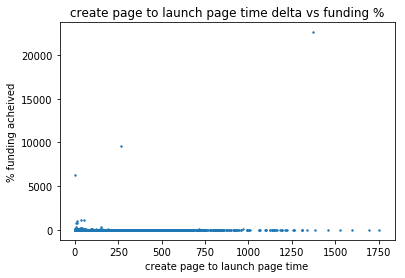

In [22]:
after_2014_create_time = pd.to_timedelta(after_2014['create_to_launch']).dt.days #convert strings to timedeltas of days
after_2014_goal_percent = after_2014['percent_goal_met']
print("maximum create time: ", after_2014_create_time.max())#this portion is not working, idxmax and max functions are not identifying the same objects
most_create_object = after_2014_create_time.iloc[after_2014_create_time.idxmax()]
print("MOST CREATE TIME: ",most_create_object) 

plt.scatter(after_2014_create_time,after_2014_goal_percent, s = 2)
plt.title('create page to launch page time delta vs funding %')
plt.xlabel('create page to launch page time')
plt.ylabel('% funding acheived')
plt.show()

This graph clearly shows that further cleanup is required of these newly created pandas series to remove outliers.  TODO: identify these outliers using max and idxmax functions on pandas series.  These functions appear to be broken currently.  

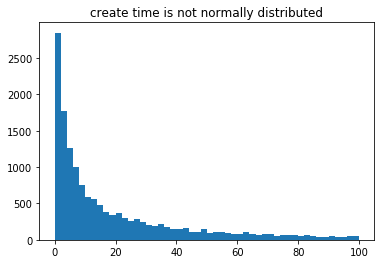

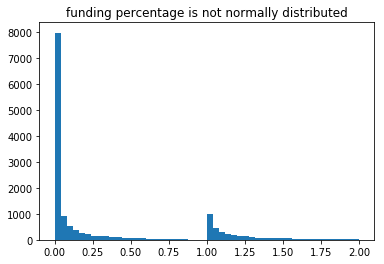

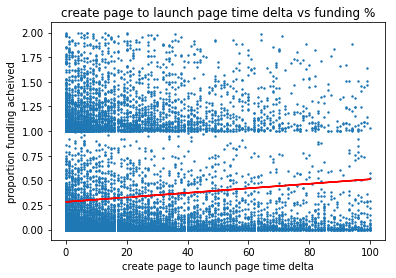

In [23]:
after_2014_create_time = after_2014[pd.to_timedelta(after_2014['create_to_launch']).dt.days <= 100] #create rule of <1000 days
after_2014_goal_percent = after_2014[after_2014['percent_goal_met']<=2] #create rule of <200% funding

merged = pd.merge(after_2014_create_time, after_2014_goal_percent, how='inner') #find the intersecting rows between the two

after_2014_create_time = pd.to_timedelta(merged['create_to_launch']).dt.days

after_2014_goal_percent = merged['percent_goal_met']

plt.hist(after_2014_create_time, bins = 50)
plt.title('create time is not normally distributed')
plt.show()

plt.hist(after_2014_goal_percent, bins = 50)
plt.title('funding percentage is not normally distributed')
plt.show()

plt.scatter(after_2014_create_time,after_2014_goal_percent, s = 2)
plt.title('create page to launch page time delta vs funding %')
plt.xlabel('create page to launch page time delta')
plt.ylabel('proportion funding acheived')
plt.plot(after_2014_create_time, np.poly1d(np.polyfit(after_2014_create_time, after_2014_goal_percent, 1))(after_2014_create_time), color = 'red')
plt.show()